In [1]:
%matplotlib inline
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import re

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

C:\Users\kefor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
wholedf = pd.read_csv('~/Desktop/PythonLearning/Police_Incident_Log.csv')
wholedf.head(10)

,Incident Id,Call Type,Date,Location,Incident Number
0,576,Domestic Disturbance,10/01/2011 07:10:00 PM,Park St,11BU023135
1,584,Traffic,10/01/2011 08:58:00 PM,S Winooski Ave/Bank St,11BU023143
2,586,Intoxication,10/01/2011 09:13:00 PM,Pearl St,11BU023145
3,587,Noise,10/01/2011 09:25:00 PM,No Willard St,11BU023146
4,591,Noise,10/01/2011 10:03:00 PM,Peru St,11BU023150
5,592,Traffic,10/01/2011 10:32:00 PM,Pine St/Locust St,11BU023151
6,595,Intoxication,10/01/2011 10:53:00 PM,Colchester Ave,11BU023154
7,599,Traffic,10/01/2011 11:40:00 PM,S Winooski Ave/Bank St,11BU023158
8,602,Noise,10/02/2011 12:02:00 AM,North St/N Winooski Ave,11BU023161
9,603,Assault - Simple,10/02/2011 12:10:00 AM,Converse Ct,11BU023162


In [3]:
# make all location lower case
wholedf.Location = wholedf.Location.str.lower()

# Split it into two parts
wholedf['Street1'], wholedf['Street2'] = wholedf['Location'].str.split('/', 1).str

# Remove trailing spaces from string
wholedf['Street1'] = wholedf.Street1.str.rstrip()
wholedf['Street2'] = wholedf.Street2.str.rstrip()


In [4]:
#ded = pd.to_datetime(wholedf['timeonly'],infer_datetime_format=True)
#ded
#ded = pd.to_datetime(wholedf['timeonly'],format='%I:%M:%S %p')
#ded
#from datetime import date
#day = date.month(wholedf['Date'])
#day

# Splite date out into seperate date and time only and then convert orginal date to datetime type
3wholedf['dateonly'], wholedf['timeonly'] = wholedf['Date'].str.split(' ', 1).str
#wholedf['monthonly'], wholedf['dayonly'] = wholedf['dateonly'].str.split('/', 1).str
#wholedf['dayonly'], wholedf['yearonly'] = wholedf['dayonly'].str.split('/', 1).str
#wholedf['houronly'], wholedf['minuteonly'] = wholedf['timeonly'].str.split(':', 1).str
#wholedf['minuteonly'], wholedf['secondonly'] = wholedf['minuteonly'].str.split(':', 1).str
#wholedf['secondonly'], wholedf['ampmonly'] = wholedf['secondonly'].str.split(' ', 1).str
wholedf['Date'] = pd.to_datetime(wholedf['Date'])
wholedf['timeonly'],wholedf['dateonly']= wholedf['Date'].apply(lambda x:x.time()), wholedf['Date'].apply(lambda x:x.date())
#wholedf['dateonly'] = pd.to_datetime(wholedf['dateonly'], format='%m/%d/%Y')
#temptimeonly = pd.to_datetime(wholedf['timeonly'],format='%I:%M:%S %p')
#wholedf['junkdate'], wholedf['24houronly'] = temptimeonly.str.split(' ', 1).str
#del whole['junkdate']

wholedf.head(10)

,Incident Id,Call Type,Date,Location,Incident Number,dateonly,timeonly,monthonly,dayonly,yearonly,houronly,minuteonly,secondonly,ampmonly,Street1,Street2
0,576,Domestic Disturbance,2011-10-01 19:10:00,park st,11BU023135,2011-10-01,07:10:00 PM,10,01,2011,07,10,00,PM,park st,NaN
1,584,Traffic,2011-10-01 20:58:00,s winooski ave/bank st,11BU023143,2011-10-01,08:58:00 PM,10,01,2011,08,58,00,PM,s winooski ave,bank st
2,586,Intoxication,2011-10-01 21:13:00,pearl st,11BU023145,2011-10-01,09:13:00 PM,10,01,2011,09,13,00,PM,pearl st,NaN
3,587,Noise,2011-10-01 21:25:00,no willard st,11BU023146,2011-10-01,09:25:00 PM,10,01,2011,09,25,00,PM,no willard st,NaN
4,591,Noise,2011-10-01 22:03:00,peru st,11BU023150,2011-10-01,10:03:00 PM,10,01,2011,10,03,00,PM,peru st,NaN
5,592,Traffic,2011-10-01 22:32:00,pine st/locust st,11BU023151,2011-10-01,10:32:00 PM,10,01,2011,10,32,00,PM,pine st,locust st
6,595,Intoxication,2011-10-01 22:53:00,colchester ave,11BU023154,2011-10-01,10:53:00 PM,10,01,2011,10,53,00,PM,colchester ave,NaN
7,599,Traffic,2011-10-01 23:40:00,s winooski ave/bank st,11BU023158,2011-10-01,11:40:00 PM,10,01,2011,11,40,00,PM,s winooski ave,bank st
8,602,Noise,2011-10-02 00:02:00,north st/n winooski ave,11BU023161,2011-10-02,12:02:00 AM,10,02,2011,12,02,00,AM,north st,n winooski ave
9,603,Assault - Simple,2011-10-02 00:10:00,converse ct,11BU023162,2011-10-02,12:10:00 AM,10,02,2011,12,10,00,AM,converse ct,NaN


,Incident Id,Call Type,Date,Location,Incident Number,dateonly,timeonly,monthonly,dayonly,yearonly,houronly,minuteonly,secondonly,ampmonly,Street1,Street2,Time
0,576,Domestic Disturbance,2011-10-01,park st,11BU023135,2011-10-01,07:10:00 PM,10,01,2011,07,10,00,PM,park st,NaN,19:10:00
1,584,Traffic,2011-10-01,s winooski av,11BU023143,2011-10-01,08:58:00 PM,10,01,2011,08,58,00,PM,s winooski av,bank st,20:58:00
2,586,Intoxication,2011-10-01,pearl st,11BU023145,2011-10-01,09:13:00 PM,10,01,2011,09,13,00,PM,pearl st,NaN,21:13:00
3,587,Noise,2011-10-01,n willard st,11BU023146,2011-10-01,09:25:00 PM,10,01,2011,09,25,00,PM,n willard st,NaN,21:25:00
4,591,Noise,2011-10-01,peru st,11BU023150,2011-10-01,10:03:00 PM,10,01,2011,10,03,00,PM,peru st,NaN,22:03:00
5,592,Traffic,2011-10-01,pine st,11BU023151,2011-10-01,10:32:00 PM,10,01,2011,10,32,00,PM,pine st,locust st,22:32:00
6,595,Intoxication,2011-10-01,colchester av,11BU023154,2011-10-01,10:53:00 PM,10,01,2011,10,53,00,PM,colchester av,NaN,22:53:00
7,599,Traffic,2011-10-01,s winooski av,11BU023158,2011-10-01,11:40:00 PM,10,01,2011,11,40,00,PM,s winooski av,bank st,23:40:00
8,602,Noise,2011-10-02,north st,11BU023161,2011-10-02,12:02:00 AM,10,02,2011,12,02,00,AM,north st,n winooski ave,00:02:00
9,603,Assault - Simple,2011-10-02,converse ct,11BU023162,2011-10-02,12:10:00 AM,10,02,2011,12,10,00,AM,converse ct,NaN,00:10:00


In [6]:
# Fix some of the spelling mistakes/differences
wholedf['Street1'] = wholedf['Street1'].str.replace("drive","dr")
wholedf['Street1'] = wholedf['Street1'].str.replace("road","rd")
wholedf['Street1'] = wholedf['Street1'].str.replace("rd.","rd")
wholedf['Street1'] = wholedf['Street1'].str.replace("avenue","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("ave.","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("ave","av")
wholedf['Street1'] = wholedf['Street1'].str.replace("parkway","pkwy")
wholedf['Street1'] = wholedf['Street1'].str.replace("street","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("st.","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("heights","hgts")
wholedf['Street1'] = wholedf['Street1'].str.replace(" 1","1")
wholedf['Street1'] = wholedf['Street1'].str.replace("no ","n ")
wholedf['Street1'] = wholedf['Street1'].str.replace(" & mansion st","")
wholedf['Street1'] = wholedf['Street1'].str.replace("st burlington vt 05401","st")
wholedf['Street1'] = wholedf['Street1'].str.replace("n willardst","n willard st")
wholedf['Street1'] = wholedf['Street1'].str.replace("stpaul st","st paul st")
wholedf['Street1'] = wholedf['Street1'].str.replace("colchestr av","colchester av")

In [7]:
calllocdf = wholedf[['Street1', 'Date']].groupby(['Street1'], as_index=False).count().sort_values(by='Date',ascending=0)
calllocdf.columns = ['Type','Count']
calllocdf.head(20)

,Type,Count
393,main st,2265
458,north av,1907
500,pearl st,1663
170,church st,1602
467,north st,1257
188,colchester av,1088
510,pine st,1035
583,s winooski av,989
609,shelburne rd,923
193,college st,909


In [8]:
# Table summary of all the types of violations by type wit percentage
countviolationdf = wholedf[['Call Type', 'Date']].groupby(['Call Type'], as_index=False).count().sort_values(by='Date',ascending=0)
countviolationdf.columns = ['Type','Count']
countviolationdf['Total']= countviolationdf['Count'].sum()
countviolationdf['Percentage'] = countviolationdf['Count'] / countviolationdf['Total']
countviolationdf

,Type,Count,Total,Percentage
16,Traffic,11747,28833,0.407415
12,Noise,3422,28833,0.118683
8,Intoxication,2640,28833,0.091562
17,Trespass,2616,28833,0.090729
13,Ordinance Violation - Other,1768,28833,0.061319
6,Domestic Disturbance,1429,28833,0.049561
11,Mental Health Issue,1225,28833,0.042486
18,Vandalism,1222,28833,0.042382
4,Burglary,872,28833,0.030243
9,Larceny - from Building,854,28833,0.029619


In [9]:
loccountdf = wholedf[['Street1', 'Date']].groupby(['Street1'], as_index=False).count().sort_values(by='Date',ascending=0)
loccountdf.columns = ['Type','Count']
loccountdf

,Type,Count
393,main st,2265
458,north av,1907
500,pearl st,1663
170,church st,1602
467,north st,1257
188,colchester av,1088
510,pine st,1035
583,s winooski av,989
609,shelburne rd,923
193,college st,909


In [10]:
wholedf['Location'] = wholedf['Street1']

In [11]:
# A subdf is used in case perimeters need to be changed
subdf = wholedf
locchurchdf = subdf[(subdf['Location'] == "church st")]
locmaindf = subdf[(subdf['Location'] == "main st")]
loccolchdf = subdf[(subdf['Location'] == "colchester av")]
locpearldf = subdf[(subdf['Location'] == "pearl st")]
locnorthavdf = subdf[(subdf['Location'] == "north av")]
loccollegedf = subdf[(subdf['Location'] == "college st")]
locnwindf = subdf[(subdf['Location'] == "n winooski av")]
locswindf = subdf[(subdf['Location'] == "s winooski av")]
locshelbdf = subdf[(subdf['Location'] == "shelburne rd")]
locnorthstdf = subdf[(subdf['Location'] == "north st")]
locpinestdf = subdf[(subdf['Location'] == "pine st")]
locstpauldf = subdf[(subdf['Location'] == "st paul st")]
locriversidedf = subdf[(subdf['Location'] == "riverside av")]

locchurchdf
locmaindf
loccolchdf
locpearldf
locnorthavdf
loccollegedf
locnwindf
locswindf
locshelbdf
locnorthstdf
locpinestdf
locstpauldf 
locriversidedf

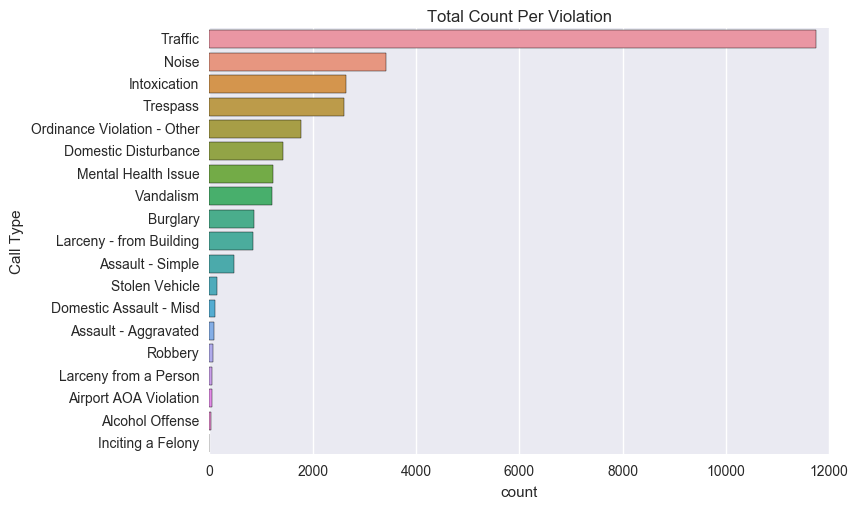

In [12]:
sns.countplot(y="Call Type", data=wholedf, order=countviolationdf['Type'])
plt.title("Total Count Per Violation")
plt.show()

In [13]:
wholedf.head()
#wholedf['timeonly'].datetime.time()

,Incident Id,Call Type,Date,Location,Incident Number,dateonly,timeonly,monthonly,dayonly,yearonly,houronly,minuteonly,secondonly,ampmonly,Street1,Street2
0,576,Domestic Disturbance,2011-10-01 19:10:00,park st,11BU023135,2011-10-01,07:10:00 PM,10,01,2011,07,10,00,PM,park st,NaN
1,584,Traffic,2011-10-01 20:58:00,s winooski av,11BU023143,2011-10-01,08:58:00 PM,10,01,2011,08,58,00,PM,s winooski av,bank st
2,586,Intoxication,2011-10-01 21:13:00,pearl st,11BU023145,2011-10-01,09:13:00 PM,10,01,2011,09,13,00,PM,pearl st,NaN
3,587,Noise,2011-10-01 21:25:00,n willard st,11BU023146,2011-10-01,09:25:00 PM,10,01,2011,09,25,00,PM,n willard st,NaN
4,591,Noise,2011-10-01 22:03:00,peru st,11BU023150,2011-10-01,10:03:00 PM,10,01,2011,10,03,00,PM,peru st,NaN


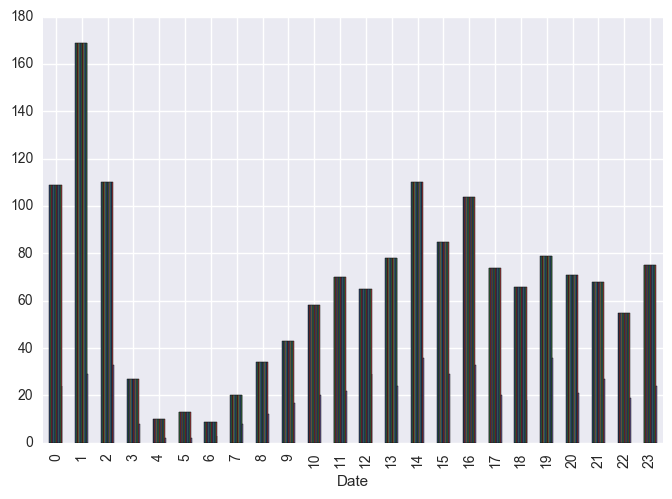

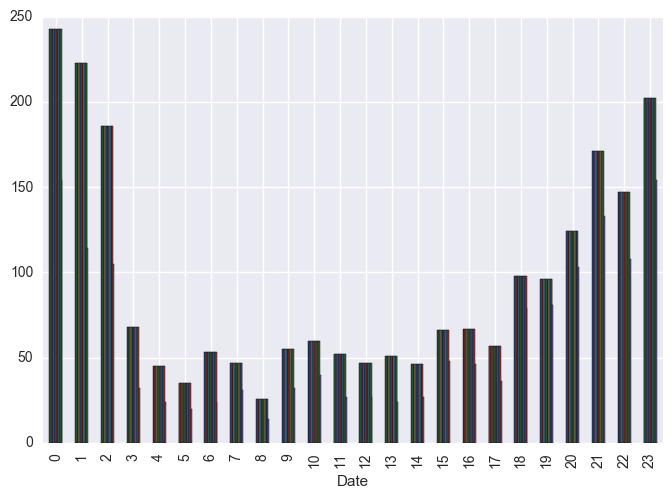

In [14]:
locchurchdf
locmaindf
loccolchdf
locpearldf
locnorthavdf
loccollegedf
locnwindf
locswindf
locshelbdf
locnorthstdf
locpinestdf
locstpauldf 
locriversidedf

locchurchdf.groupby(locchurchdf['Date'].dt.hour).count().plot(kind="bar")
plt.legend().set_visible(False)
locmaindf.groupby(locmaindf['Date'].dt.hour).count().plot(kind="bar")
plt.legend().set_visible(False)
plt.show()
#sns.countplot(y="timeonly", data=locmaindf)
#sns.countplot(y="houronly", data=loccolchdf, order=countviolation['Type'])
#sns.countplot(y="houronly", data=locpearldf, order=countviolation['Type'])
#sns.countplot(y="houronly", data=locnorthavdf, order=countviolation['Type'])



In [15]:
wholedf.groupby(wholedf['Date'].dt.hour).count()

#wholedf.loc[(wholedf['ampmonly'] == "PM"), 'houronly'] = (wholedf['houronly'] + 12)
#wholedf.head(10)

,Incident Id,Call Type,Date,Location,Incident Number,dateonly,timeonly,monthonly,dayonly,yearonly,houronly,minuteonly,secondonly,ampmonly,Street1,Street2
Date,,,,,,,,,,,,,,,,
0,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,2155,1031
1,1677,1677,1677,1676,1677,1677,1677,1677,1677,1677,1677,1677,1677,1677,1676,751
2,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,1244,540
3,627,627,627,627,627,627,627,627,627,627,627,627,627,627,627,235
4,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,125
5,347,347,347,347,347,347,347,347,347,347,347,347,347,347,347,165
6,443,443,443,443,443,443,443,443,443,443,443,443,443,443,443,230
7,629,629,629,628,629,629,629,629,629,629,629,629,629,629,628,342
8,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,269


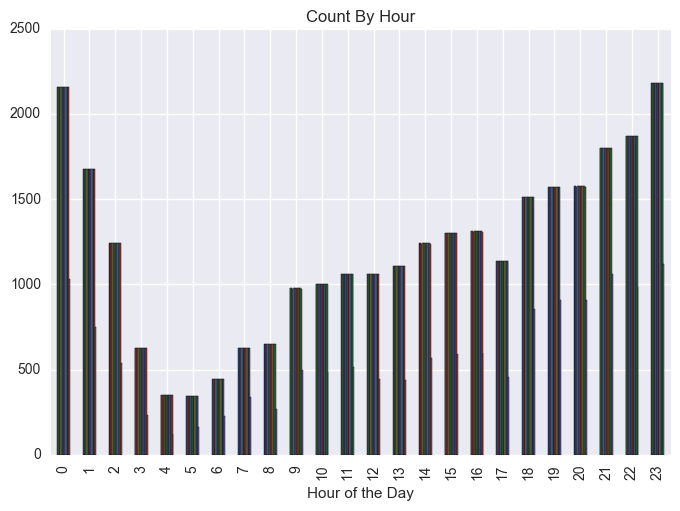

In [16]:
wholedf.groupby(wholedf['Date'].dt.hour).count().plot(kind="bar")
plt.title("Count By Hour")
plt.legend().set_visible(False)
plt.xlabel("Hour of the Day")
plt.show()

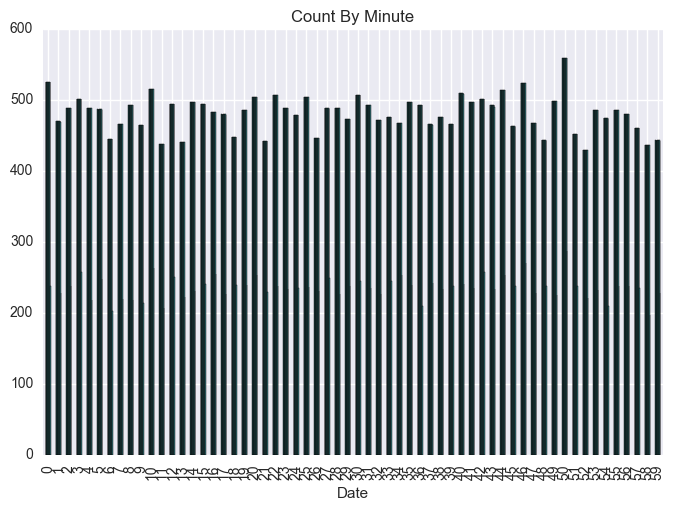

In [17]:
wholedf.groupby(wholedf['Date'].dt.minute).count().plot(kind="bar",color='#468f94')
plt.title("Count By Minute")
plt.legend().set_visible(False)
plt.show()

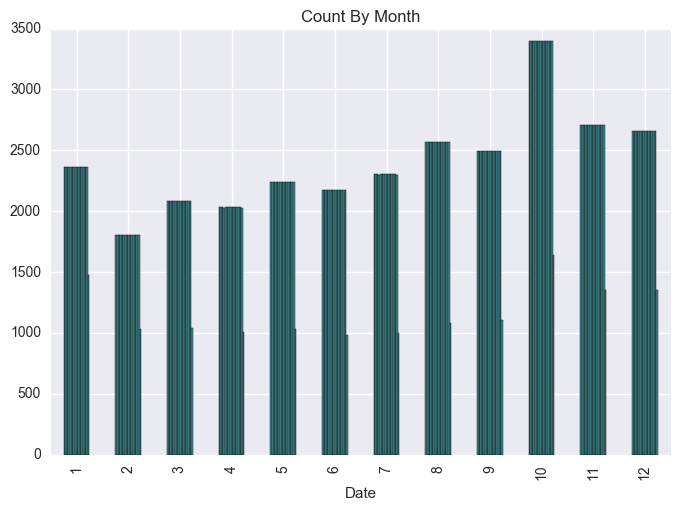

In [18]:
#del wholedf['Street2']
wholedf.groupby(wholedf['Date'].dt.month).count().plot(kind="bar",color='#468f94')
plt.title("Count By Month")
plt.legend().set_visible(False)
plt.show()

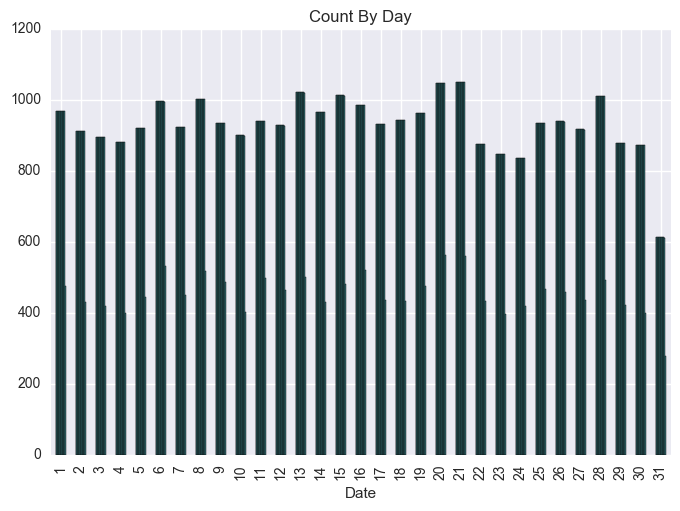

In [19]:
wholedf.groupby(wholedf['Date'].dt.day).count().plot(kind="bar",color='#468f94')
plt.title("Count By Day")
plt.legend().set_visible(False)
plt.show()

In [20]:
#wholedf.groupby(wholedf['Street1']).count().plot(kind="bar")
#plt.show()

In [21]:
loctopdf = wholedf[(wholedf['Location'] == "main st") |
                  (wholedf['Location'] == "north av") |
                  (wholedf['Location'] == "pearl st") |
                  (wholedf['Location'] == "church st") |
                  (wholedf['Location'] == "north st") |
                  (wholedf['Location'] == "colchester av") |
                  (wholedf['Location'] == "pine st") | 
                  (wholedf['Location'] == "s winooski av") | 
                  (wholedf['Location'] == "shelburne rd") |
                  (wholedf['Location'] == "college st")]

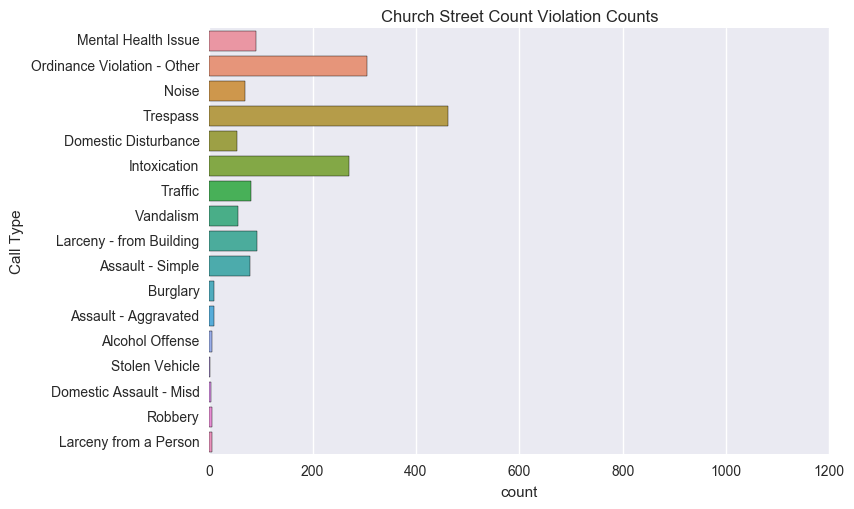

In [22]:
sns.countplot(y="Call Type", data=locchurchdf)
sns.plt.title('Church Street Count Violation Counts')
plt.xlim(0,1200)
plt.show()

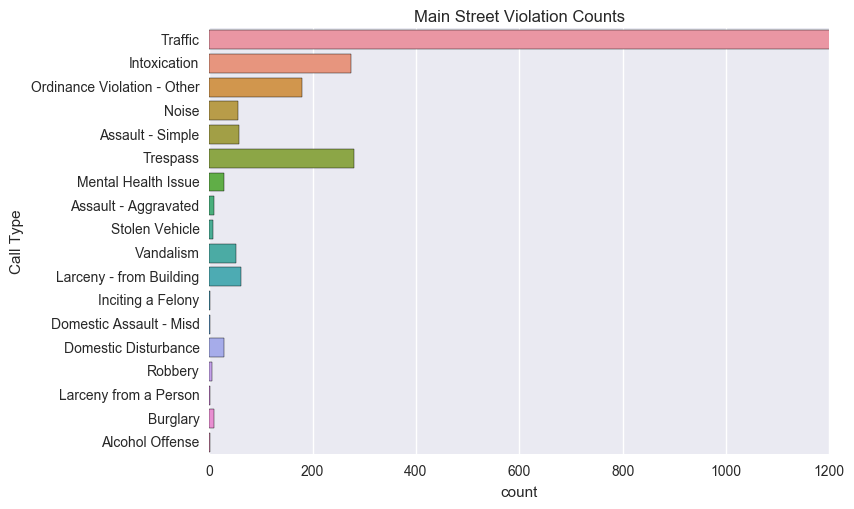

In [23]:
sns.countplot(y="Call Type", data=locmaindf)
plt.xlim(0,1200)
sns.plt.title('Main Street Violation Counts')
plt.show()

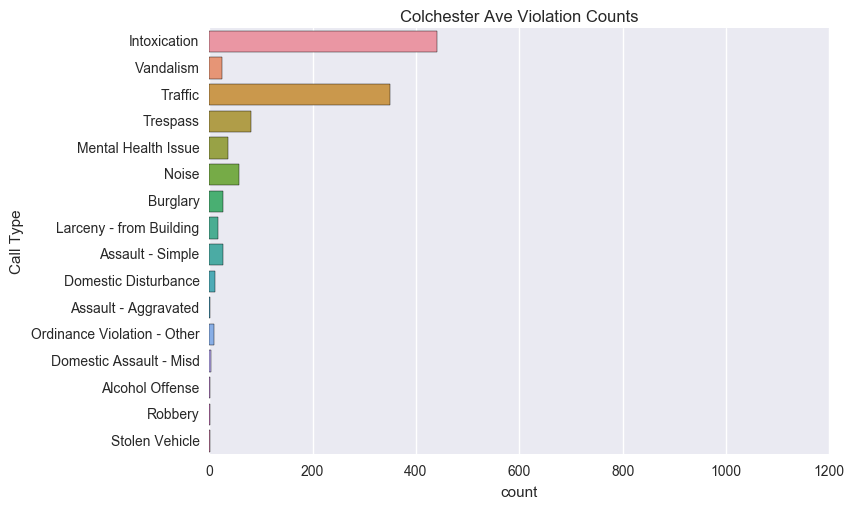

In [24]:
sns.countplot(y="Call Type", data=loccolchdf)
plt.xlim(0,1200)
sns.plt.title('Colchester Ave Violation Counts')
plt.show()

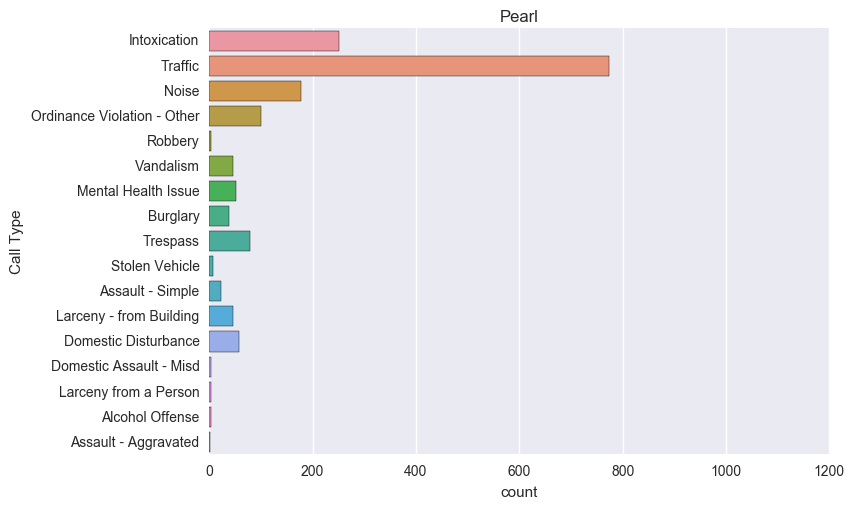

In [25]:
sns.countplot(y="Call Type", data=locpearldf)
plt.xlim(0,1200)
sns.plt.title('Pearl')
plt.show()

In [26]:
sns.countplot(y="Call Type", data=loccollegedf)
plt.xlim(0,1500)
sns.plt.title('College Street)
plt.show()


SyntaxError: EOL while scanning string literal (<ipython-input-26-3e1300e889a1>, line 3)

In [ ]:
sns.countplot(y="Call Type", data=locnorthavdf)
plt.xlim(0,1200)
sns.plt.title('North Ave')
plt.show()

In [ ]:
sns.countplot(y="Call Type", data=locstpauldf)
plt.xlim(0,1200)
sns.plt.title('St Paul')
plt.show()

In [ ]:
sns.countplot(y="Call Type", data=locpinestdf)
plt.xlim(0,1200)
sns.plt.title('Pine St')
plt.show()

In [ ]:
toploctypedf = locmaindf[['Call Type', 'Location']].groupby(['Call Type'], as_index=False).count().sort_values(by='Location',ascending=0)
toploctypedf

In [ ]:
toploctypedf = locchurchdf[['Call Type', 'Location']].groupby(['Call Type'], as_index=False).count().sort_values(by='Location',ascending=0)
toploctypedf

In [ ]:
toploctypedf = loccolchdf[['Call Type', 'Location']].groupby(['Call Type'], as_index=False).count().sort_values(by='Location',ascending=0)
toploctypedf

In [ ]:
wholedf['Location'] = str(wholedf['Location'])

import re

# function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\/', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles
titles = wholedf['Location'].apply(get_title)

titles
#Add in the title column with all the current values so we can then manually change them
#train_df["Title"] = titles

In [ ]:
locdf = wholedf[['Street1']]
locunique = pd.unique(locdf.Street1.ravel())
locunique